In [ ]:
import numpy as np
import pysindy as ps
from pysindy.feature_library import PolynomialLibrary, FourierLibrary, CustomLibrary
import matplotlib.pyplot as plt

from generate_data import generate_population_data

In [ ]:
t = np.linspace(0, 100, 1001)

x0 = [50, 50]
x0_val = [100, 30]

x, x_dot = generate_population_data(t, x0)
x_val, _ = generate_population_data(t, x0_val)

In [10]:
model = ps.SINDy(
    feature_library=PolynomialLibrary(degree=2), # 2, 1
    # feature_library=FourierLibrary(n_frequencies=1), # 2, 1
    optimizer=ps.STLSQ(threshold=0.001), # 0.001, 0.01, 0.1
    feature_names=[f'x{i+1}' for i in range(len(x[0]))]
    )
model.fit(x=x, x_dot=x_dot, t=t)
model.print()

(x1)' = 0.500 x1 + -0.025 x1 x2
(x2)' = -0.500 x2 + 0.005 x1 x2


In [ ]:
for x_num in range(len(x0)):
    q = 'Biblioteka funkcji & Próg & $\Dot{x}'
    print(f'{q}_{x_num+1}$ & $E_{x_num+1}$ \\\\')
    for i, library in enumerate([FourierLibrary(n_frequencies=2), FourierLibrary(n_frequencies=1), PolynomialLibrary(degree=2), PolynomialLibrary(degree=1)]):
        print(f'\\hline')
        for threshold in range(3):
            threshold = 10**(threshold-3) if i >= 2 else 100*10**(threshold-3)
            name = ['Trygonometryczna (st. 2)', 'Trygonometryczna (st. 1)', 'Wielomiany (st. 2)', 'Liniowa']
            model = ps.SINDy(
                feature_library=library,
                optimizer=ps.STLSQ(threshold=threshold),
                feature_names=[f'x{i+1}' for i in range(len(x0))])
            model.fit(x=x, x_dot=x_dot, t=t)
            x_sim = model.simulate(x0=x0_val, t=t)
            mse = ((x_sim - x_val)**2).mean(axis=0)
            if len(model.equations()[x_num].split('+')) > 2:
                eq = model.equations()[x_num].split('+')[0] + '+' + model.equations()[x_num].split('+')[1] + '\dots'
            else:
                eq = model.equations()[x_num]
            eq = eq.replace('.', ',').replace('+ -', '- ').replace('sin', '\sin').replace('cos', '\cos').replace('(1 x1)', '(x_1)').replace('(1 x2)', '(x_2)').replace('x2', 'x_2').replace('x1', 'x_1').replace('(1 u)', '(u)')
            print(f"{name[i]} & {(str(threshold).replace('.', ',') + ' &').replace(',0 &', ' &')} ${eq}$ & {str(round(mse[x_num], 2)).replace('.', ',')} \\\\")
    print('\n\n')

In [12]:
x_sim = model.simulate(x0=x0_val, t=t)
mse_x1 = ((x_sim[:, 0] - x_val[:, 0])**2).mean()
mse_x2 = ((x_sim[:, 1] - x_val[:, 1])**2).mean()
print(f'Błąd średniokwadratowy x1: {mse_x1:.2f}, x2: {mse_x2:.2f}')

Błąd średniokwadratowy x1: 1.74, x2: 0.07


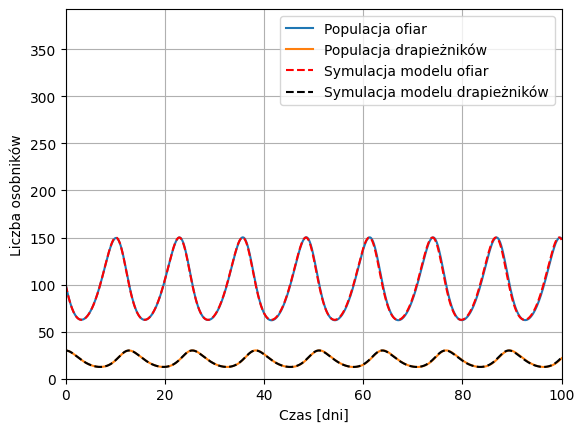

In [14]:
plt.plot(t, x_val[:, 0])
plt.plot(t, x_val[:, 1])
plt.plot(t, x_sim[:, 0], "r--")
plt.plot(t, x_sim[:, 1], "k--")
plt.legend(["Populacja ofiar", "Populacja drapieżników", "Symulacja modelu ofiar", "Symulacja modelu drapieżników"])
plt.ylim(0, max(x[:, 0]*1.4))
plt.xlim(0, max(t))
plt.xlabel("Czas [dni]")
plt.ylabel("Liczba osobników")
plt.grid()
plt.show()